In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import*
import seaborn as sns
sns.set(style="darkgrid")
import category_encoders as ce
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [31]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

In [32]:
df = pd.read_csv(
        'train.csv',
        dtype={
            "id": np.int32,
            "keyword":str,
            "location":str,
            "text":str,
            "target":np.int32,
        }
)

In [33]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Analisis General

In [34]:
#Tamaño
df.shape

(7613, 5)

In [35]:
#Informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int32 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 238.0+ KB


In [36]:
#Descripcion General
df.describe( include = 'all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [37]:
#Elementos faltantes
faltantes= pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Cantidad de nulls'])
total = faltantes['Cantidad de nulls'].sum()
faltantes['% del total de nulls']= round(100*faltantes['Cantidad de nulls']/total,2)
faltantes

,Cantidad de nulls,% del total de nulls
location,2533,97.65
keyword,61,2.35
target,0,0.00
text,0,0.00
id,0,0.00


# Columna id

In [38]:
df['id'].nunique()

7613

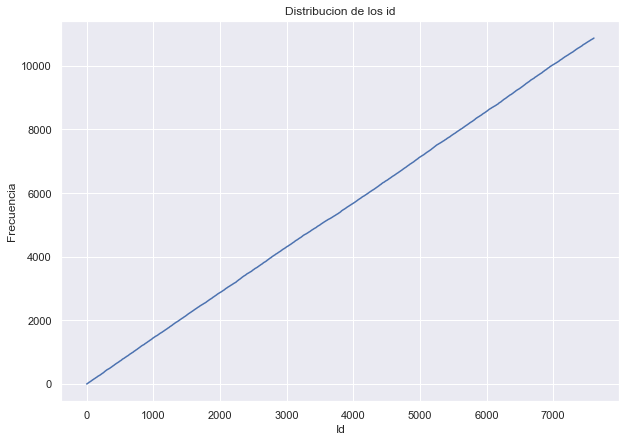

In [39]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), sharey=True)

ax1.set_title('Distribucion de los id')
ax1.set_xlabel('Id')
ax1.set_ylabel('Frecuencia')
ax1.plot(df['id'])
plt.show()

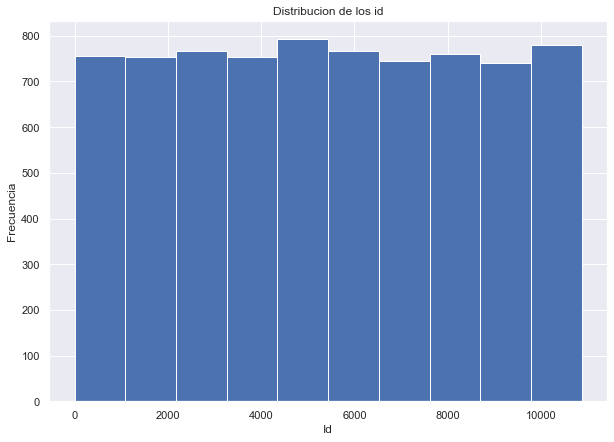

In [40]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), sharey=True)

ax1.set_title('Distribucion de los id')
ax1.set_xlabel('Id')
ax1.set_ylabel('Frecuencia')
ax1.hist(df['id'])
plt.show()

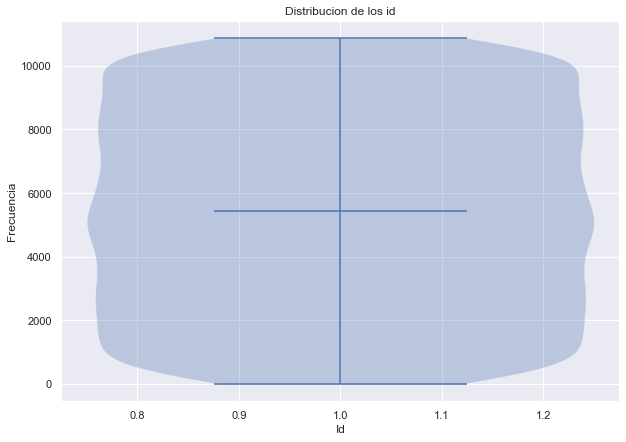

In [41]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), sharey=True)

ax1.set_title('Distribucion de los id')
ax1.set_xlabel('Id')
ax1.set_ylabel('Frecuencia')
ax1.violinplot(df['id'],showmeans=True, showmedians=False,showextrema=True)
plt.show()

# Columna keyword

In [42]:
df['keyword'].nunique()

221

In [43]:
#Lleno elementos nulos
df_keyword_2 = df
df_keyword_2['keyword'] = df_keyword_2['keyword'].fillna(value='Vacio')

In [44]:
df_keyword_2["keyword"] = df_keyword_2["keyword"].astype('category')

In [45]:
df_keyword_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        7613 non-null   int32   
 1   keyword   7613 non-null   category
 2   location  5080 non-null   object  
 3   text      7613 non-null   object  
 4   target    7613 non-null   int32   
dtypes: category(1), int32(2), object(2)
memory usage: 205.2+ KB


In [46]:
df_keyword_2.head()

,id,keyword,location,text,target
0,1,Vacio,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,Vacio,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,Vacio,NaN,All residents asked to 'shelter in place' are ...,1
3,6,Vacio,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,Vacio,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [47]:
df_keyword_2['keyword'].nunique() # Con 8 bts puedo hacer binary encodding

222

In [48]:
df_keyword_2['keyword'].value_counts().sort_values(ascending=False)

Vacio                    61
fatalities               45
armageddon               42
deluge                   42
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [49]:
#Binary Encoding
encoder = ce.BinaryEncoder(cols=['keyword'])

one_hot_encoded = encoder.fit_transform(df_keyword_2)
one_hot_encoded.head(1)

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,id,location,text,target
0,0,0,0,0,0,0,0,0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1


In [50]:

df_keyword_3 = df
df_keyword_3['keyword'] = df_keyword_3['keyword'].fillna(value='Vacio')
df_keyword_3["keyword"] = df_keyword_3["keyword"].astype('category')
df_keyword_3['keyword'] = df_keyword_3['keyword'].cat.codes

In [51]:
keywords = df['keyword'].astype('str').str.upper().value_counts()
keywords

0      61
105    45
64     42
9      42
58     41
       ..
116    19
95     12
195    11
135    10
161     9
Name: keyword, Length: 222, dtype: int64

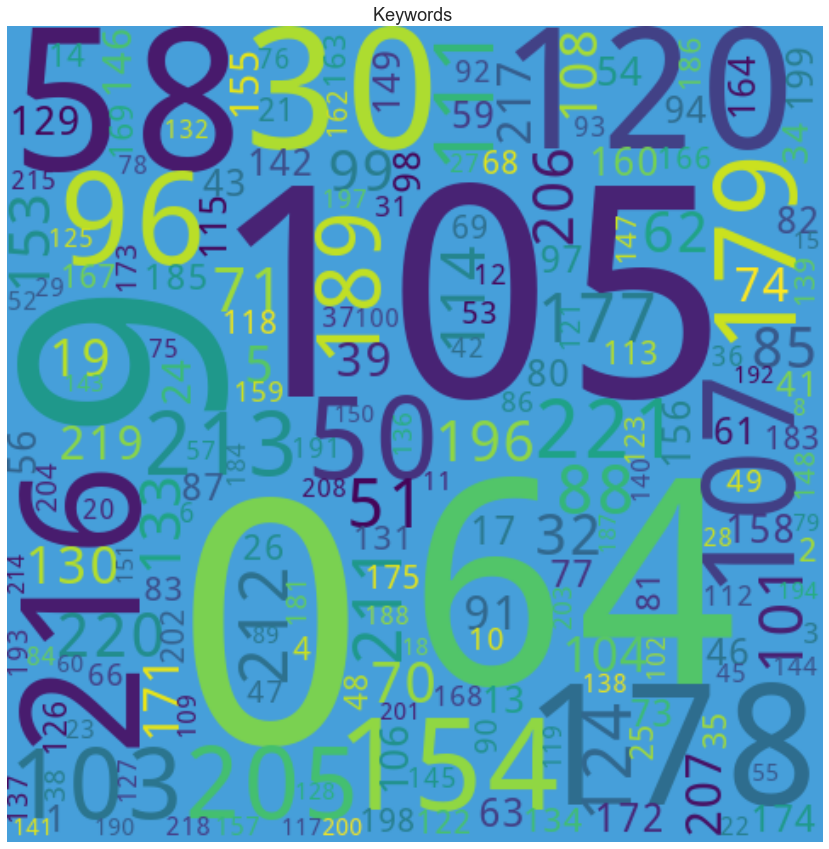

In [52]:
from wordcloud import WordCloud

# Función para realizar un gráfico de nube de palabras en funión de un diccionario de palabras y frecuencias

def wordcloud(frecuencias,titulo,tamanio=(15,15)):
    wordcloud = WordCloud(width=480, height=480, margin=0,background_color='#469FDA').generate_from_frequencies(frequencies=frecuencias)
    plt.figure(figsize=tamanio)
    plt.title(titulo,fontSize=18)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
    
wordcloud(keywords,titulo='Keywords ')

# Columna Location 

In [53]:
df_location = df

In [54]:
df_location = df_location.dropna(subset=['location'])

In [55]:
df_location.shape

(5080, 5)

In [56]:
df_location['location'].value_counts().sort_values(ascending = False)

USA                              104
New York                          71
United States                     50
London                            45
Canada                            29
                                ... 
instagram: bribriony               1
Nova Scotia, Canada                1
[@blackparavde is my frankie]      1
Mpela'zwe                          1
travelling to tae's pants          1
Name: location, Length: 3341, dtype: int64

In [57]:
df_location['location'].nunique()

3341

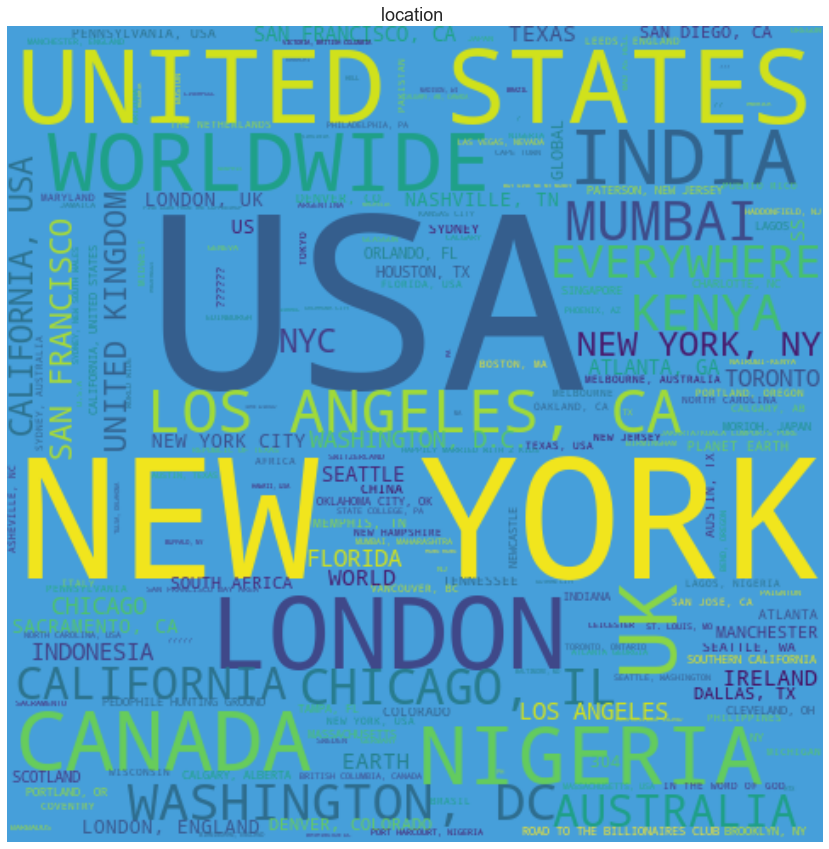

In [58]:
keywords = df_location['location'].astype('str').str.upper().value_counts()
keywords
wordcloud(keywords,titulo='location ')

# Columna texto

In [59]:
df_text = df

In [60]:
df_text

,id,keyword,location,text,target
0,1,0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,0,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,0,NaN,All residents asked to 'shelter in place' are ...,1
3,6,0,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,0,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,0,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,0,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,0,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,0,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
#Ejemplo
doc = nlp("This is a sentence. running")
displacy.serve(doc, style="dep")

C:\Users\Giova\Anaconda3\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [28]:
for i, row in df_text.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["text"] and len(str(row["text"])) < 1000000):
        doc = nlp(str(row["text"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []
        simbolos = []

        for token in doc:
            
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
            if token.pos_ == "SYM":
                simbolos.append(token.lemma_)
                              
        df_text.at[i, "selftext_nouns"] = " ".join(nouns)
        df_text.at[i, "selftext_adjectives"] = " ".join(adjectives)
        df_text.at[i, "selftext_verbs"] = " ".join(verbs)
        df_text.at[i, "selftext_nav"] = " ".join(nouns+adjectives+verbs)
        df_text.at[i, "no_tokens"] = len(lemmas)
        df_text.at[i, "verbos"] = len(verbs)
        df_text.at[i, "abjetivos"] = len(adjectives)
        df_text.at[i, "sustantivos"] = len(nouns)
        df_text.at[i, "simbolos"] = len(simbolos)
        df_text.at[i, "longitud"] = len(row["text"])

0
1000
2000
3000
4000
5000
6000
7000


In [29]:
df_text.head()

,id,keyword,location,text,target,selftext_lemma,selftext_nouns,selftext_adjectives,selftext_verbs,selftext_nav,no_tokens,verbos,abjetivos,sustantivos,simbolos,longitud
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,-PRON- Deeds be the Reason of this # earthquak...,Deeds Reason earthquake ALLAH,#,forgive,Deeds Reason earthquake ALLAH # forgive,0.0,1.0,1.0,4.0,0.0,69.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near La Ronge Sask . Canada,forest fire La Ronge Sask Canada,,,forest fire La Ronge Sask Canada,0.0,0.0,0.0,6.0,0.0,38.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all resident ask to ' shelter in place ' be be...,resident place officer evacuation shelter plac...,other,ask shelter notify expect,resident place officer evacuation shelter plac...,0.0,4.0,1.0,7.0,0.0,133.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive # wildfire evacuation or...",people wildfire evacuation order California,,receive,people wildfire evacuation order California re...,0.0,1.0,0.0,5.0,1.0,65.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just get send this photo from Ruby # Alaska as...,photo Ruby # Alaska smoke wildfire school,,get send pour,photo Ruby # Alaska smoke wildfire school get ...,0.0,3.0,0.0,7.0,1.0,88.0
